# 로지스틱 회귀(Logistic Regression)

- 선형회귀방식을 분류에 적용한 알고리즘

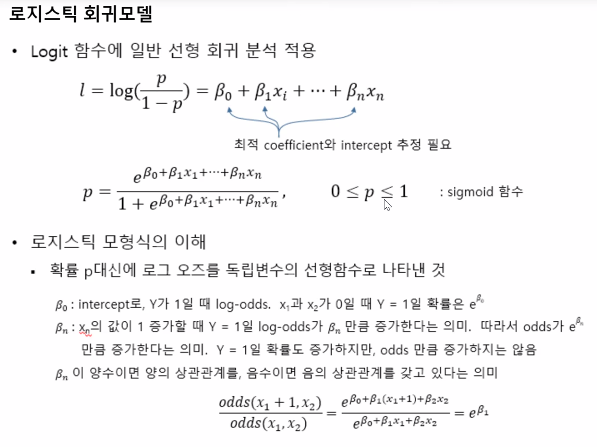

### 사이킷런의 로지스틱 회귀 클래스 LogistricRegression

https://sci2lab.github.io/ml_tutorial/logistic_regression/

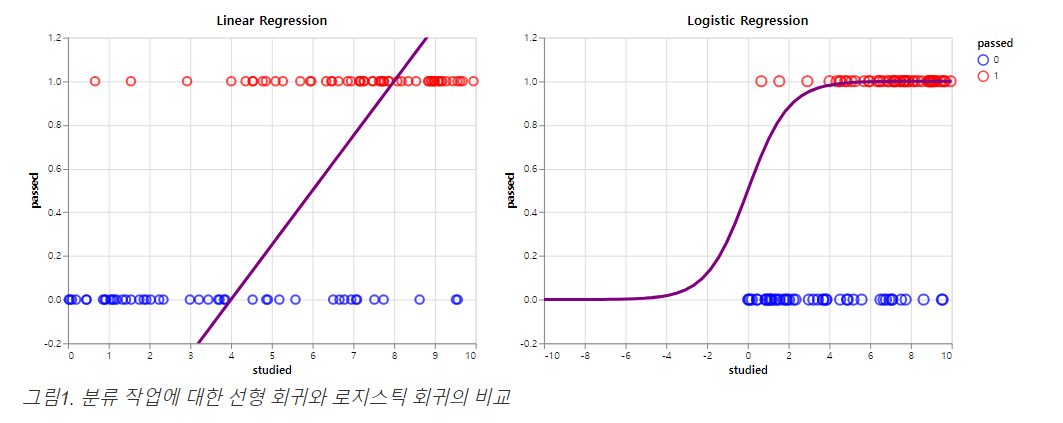

**주요 매개변수**
- penalty : 규제 유형, 'l1', 'l2'
- C : 규제 강도 조절 alpha의 역수, C값이 클수록 규제강도가 큼

### 유방암 분류 문제

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
cancerDF = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancerDF.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


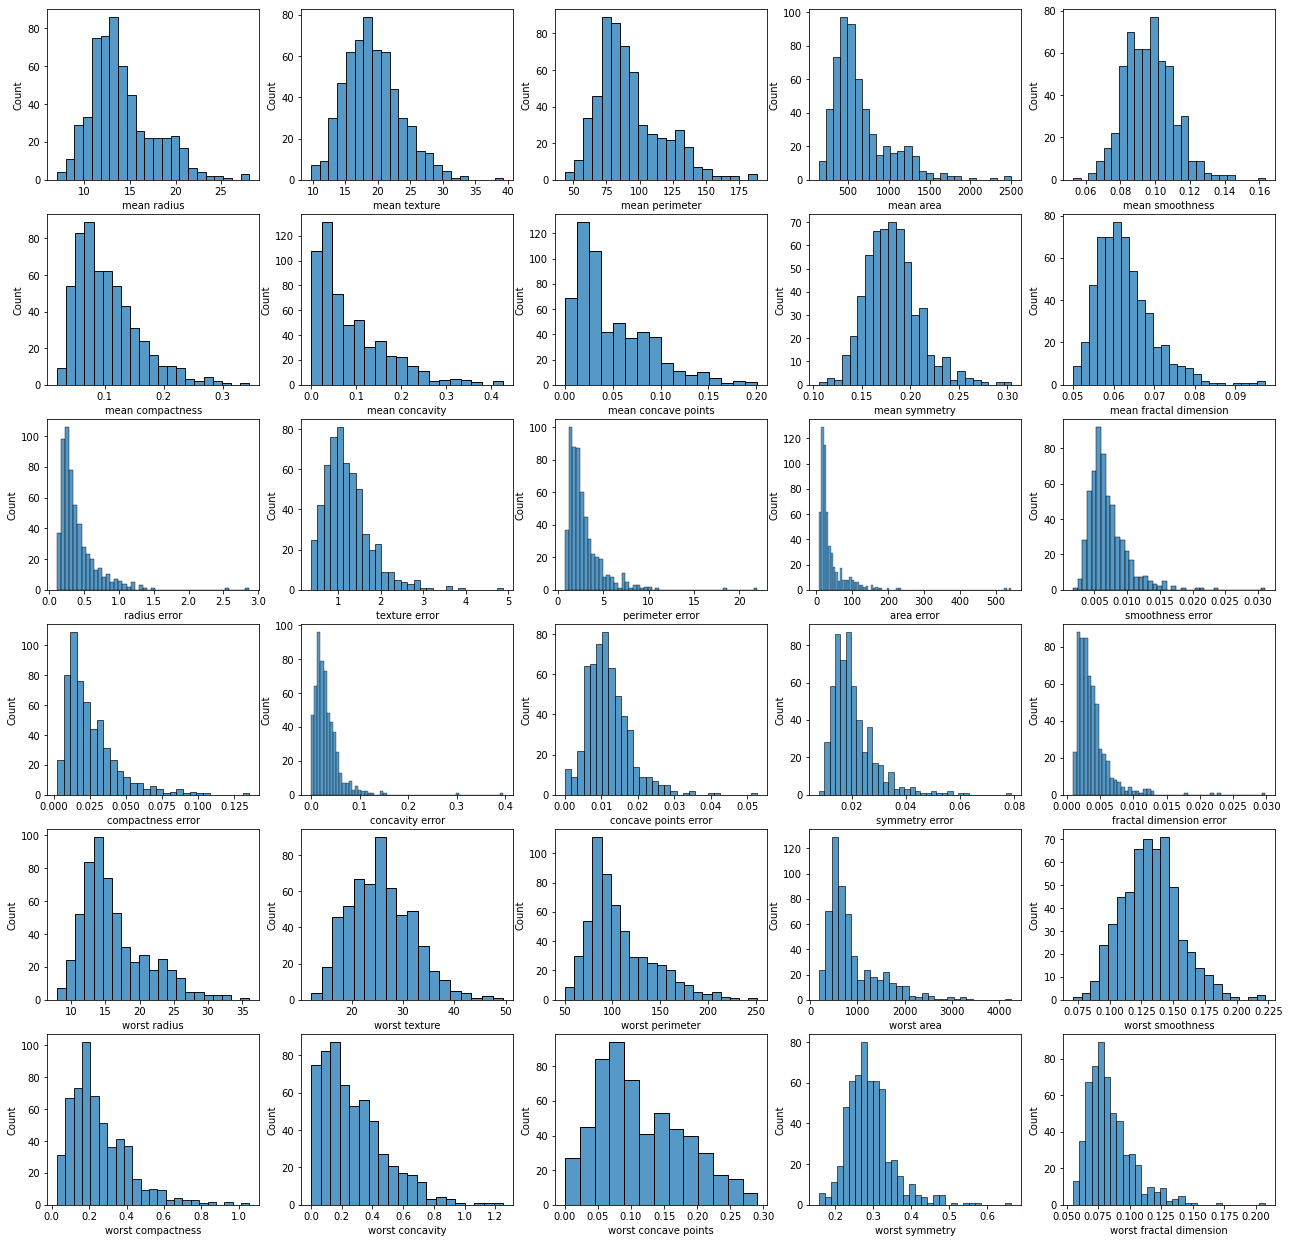

In [3]:
# 각 피처에 대한 분포도 확인
import seaborn as sns

fig, axs = plt.subplots(figsize=(22,22), nrows=6, ncols=5)

for i, feature in enumerate(cancer.feature_names):
    row = i// 5
    col = i % 5
    sns.histplot(cancerDF[feature], ax = axs[row][col])

**피처변수들의 Z-스케일링**

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# StandardScaler( )로 평균이 0, 분산 1로 데이터 분포도 변환
ss = StandardScaler()
ss_data = ss.fit_transform(cancer.data)

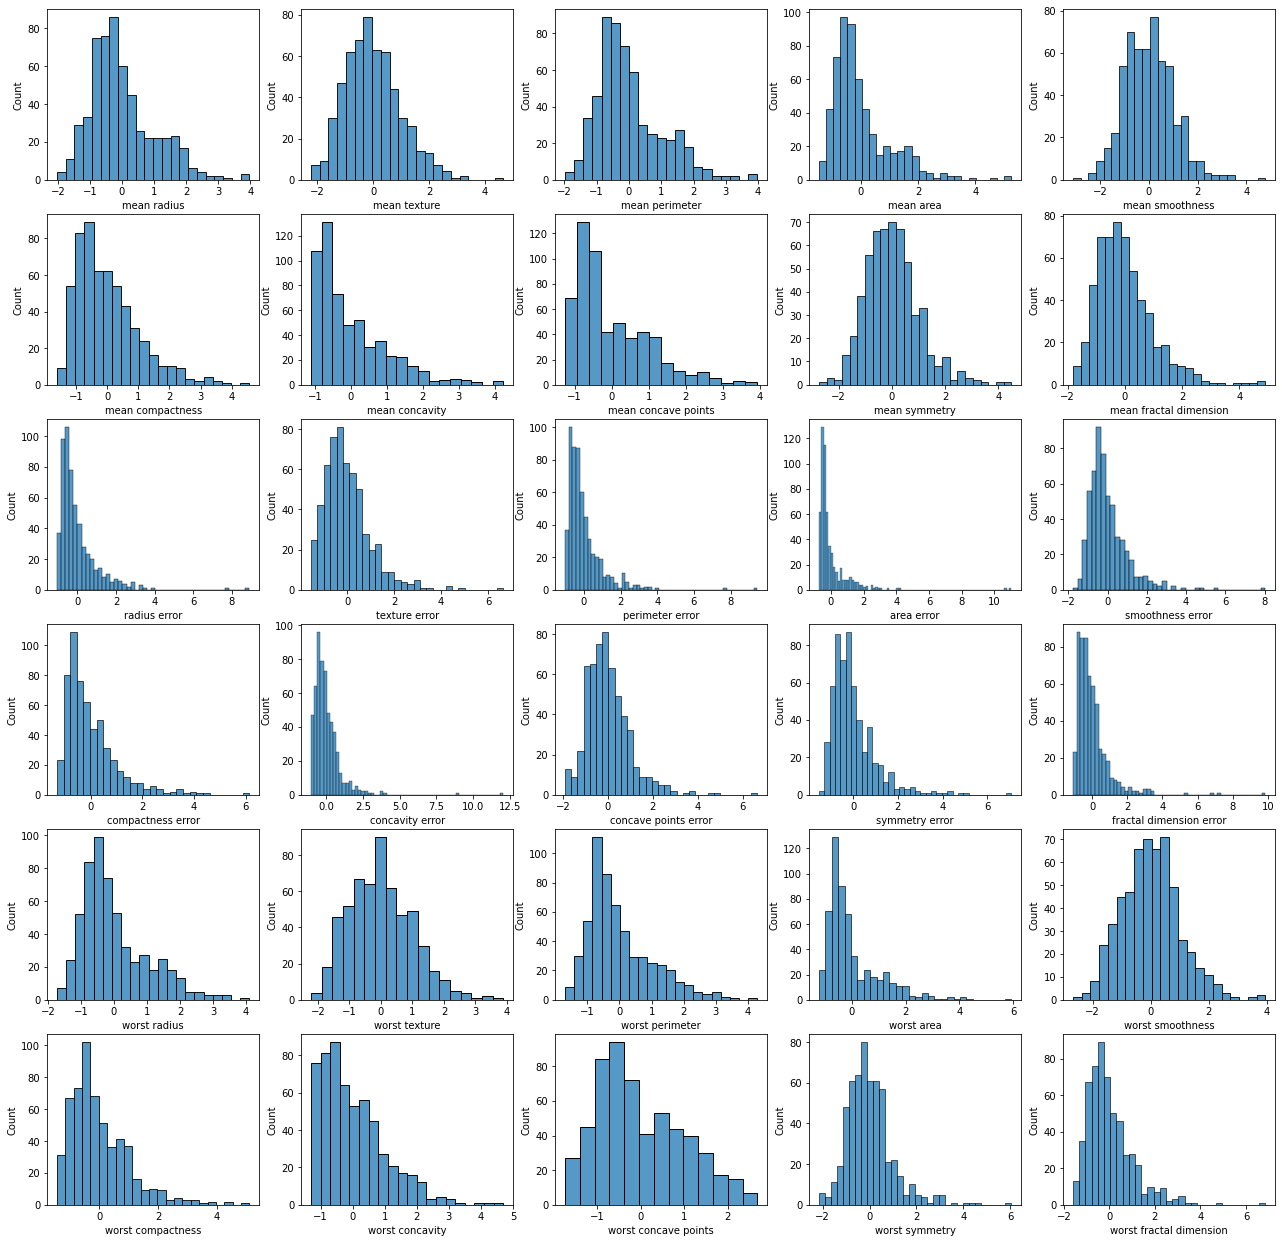

In [5]:
# 각 피처에 대한 분포도 확인
ss_data_df = pd.DataFrame(data=ss_data, columns=cancer.feature_names)
fig, axs = plt.subplots(figsize=(22,22), nrows=6, ncols=5)

for i, feature in enumerate(cancer.feature_names):
    row = i// 5
    col = i % 5
    sns.histplot(ss_data_df[feature], ax = axs[row][col])

**로지스틱 회귀를 이용하여 학습 및 예측 수행**

In [6]:
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(ss_data, cancer.target, random_state=0, test_size=0.3)
# 로지스틱 회귀를 이용하여 학습 및 예측 수행. 
lr = LogisticRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
# accuracy와 roc_auc 측정
acc = accuracy_score(y_test, pred)
roc = roc_auc_score(y_test, pred)

print('Accuracy :', np.round(acc, 3))
print('ROC :', np.round(roc, 3))

Accuracy : 0.977
ROC : 0.972


**로지스틱회귀에서 규제를 적용한 최적의 모델 검증**

In [7]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

params = {'penalty' : ['l2', 'l1'], 'C' : [0.01, 0.1, 1, 1.5, 10]}

grid_cv = GridSearchCV(lr, param_grid=params, scoring='accuracy', cv=3)
grid_cv.fit(ss_data, cancer.target)
print('최적의 파라미터 :', grid_cv.best_params_)
print('최적 평균 정확도 : {:.3f}'.format(grid_cv.best_score_))

최적의 파라미터 : {'C': 1, 'penalty': 'l2'}
최적 평균 정확도 : 0.975


# 회귀 트리(Regression Tree)

- 트리 기반의 회귀 알고리즘
- 트리 생성 방식은 분류 트리와 같으나, 리프 노드에서 예측 결정 값을 만드는 과정이 다름
    - 리프 노드에 속하는 데이터 값의 평균값을 구해 회귀 예측값으로 결정

### 사이킷런의 회귀를 위한 결정 트리 기반의 클래스들

- 결정트리, 랜덤포레스트, GBM, XGBoost, LightGBM 모두 회귀 분석 가능

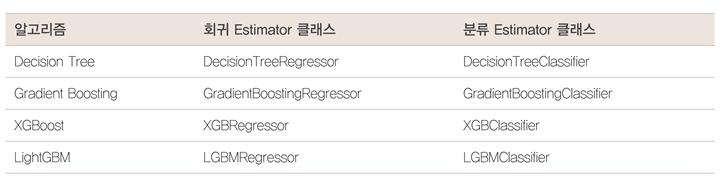

### 보스턴 주택 가격 예측 문제

In [8]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# 데이터로드
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

# X, y 나누기
y = df['PRICE']
X = df.drop('PRICE', axis=1, inplace=False)

# 모델객체 생성
rf = RandomForestRegressor(random_state=0, n_estimators=1000)

# cross_val_score 이용하여 교차검증 : cv=5
neg_mse = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
mse = neg_mse*(-1)
avg_mse = np.mean(mse)
rmse = np.sqrt(mse)
avg_rmse = np.mean(rmse)

print('5교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse, 2))
print('5교차 검증의 개별 RMSE scores :', np.round(rmse, 2))
print('5교차 검증의 개별 평균 RMSE : ', np.round(avg_rmse, 2))

5교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 개별 평균 RMSE :  4.42


In [11]:
def get_model_cv_prediction(model, X_data, y_target, cv=5, scoring='neg_mean_squared_error'):
    neg_mse = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    mse = neg_mse*(-1)
    avg_mse = np.mean(mse)
    rmse = np.sqrt(mse)
    avg_rmse = np.mean(rmse)
    
    print('####', model.__class__.__name__, '####')
    print('5교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse, 2))
    print('5교차 검증의 개별 RMSE scores :', np.round(rmse, 2))
    print('5교차 검증의 개별 평균 RMSE : ', np.round(avg_rmse, 2))
    

**다양한 유형의 회귀트리를 생성하고 보스턴 주택 가격 예측**

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gbm_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgbm_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg, rf_reg, gbm_reg, xgb_reg, lgbm_reg]

for model in models:
    get_model_cv_prediction(model, X, y)

#### DecisionTreeRegressor ####
5교차 검증의 개별 Negative MSE scores :  [-11.94 -36.25 -29.63 -47.23 -65.56]
5교차 검증의 개별 RMSE scores : [3.46 6.02 5.44 6.87 8.1 ]
5교차 검증의 개별 평균 RMSE :  5.98
#### RandomForestRegressor ####
5교차 검증의 개별 Negative MSE scores :  [ -7.88 -13.14 -20.57 -46.23 -18.88]
5교차 검증의 개별 RMSE scores : [2.81 3.63 4.54 6.8  4.34]
5교차 검증의 개별 평균 RMSE :  4.42
#### GradientBoostingRegressor ####
5교차 검증의 개별 Negative MSE scores :  [ -7.52 -14.52 -19.57 -39.45 -16.72]
5교차 검증의 개별 RMSE scores : [2.74 3.81 4.42 6.28 4.09]
5교차 검증의 개별 평균 RMSE :  4.27
#### XGBRegressor ####
5교차 검증의 개별 Negative MSE scores :  [ -9.17 -13.74 -13.95 -41.76 -18.69]
5교차 검증의 개별 RMSE scores : [3.03 3.71 3.73 6.46 4.32]
5교차 검증의 개별 평균 RMSE :  4.25
#### LGBMRegressor ####
5교차 검증의 개별 Negative MSE scores :  [ -8.96 -18.58 -17.05 -43.71 -26.92]
5교차 검증의 개별 RMSE scores : [2.99 4.31 4.13 6.61 5.19]
5교차 검증의 개별 평균 RMSE :  4.65


**회귀트리의 피처변수별 중요도**
- Regressor 클래스는 회귀계수 제공 속성 coef_ 가 없음
- 대신 feature_importances_를 이용해 피처별 중요도 제공

<AxesSubplot:>

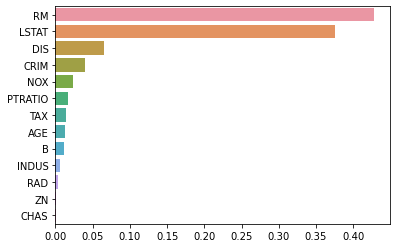

In [16]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_data, y_target 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X, y)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

### 주택가격 데이터 셋에서  'RM' 변수와 'PRICE' 변수 만 선택하여 단순회귀분석
- 독립변수 : 'RM' (거주할 수 있는 방의 수)
- 종속변수 : 'PRICE' (주택 가격)
- 데이터 개수 : 100

(506, 2)


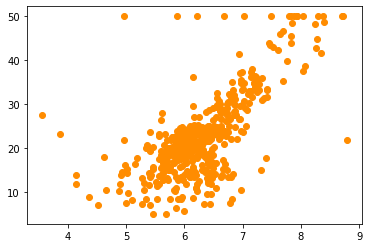

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

bostonDF_sample = df[['RM','PRICE']]
bostonDF_sample = df.sample(n=100,random_state=0) # 이거 주석처리하면 더 많이 나옴
print(bostonDF_sample.shape)
plt.figure()
plt.scatter(bostonDF_sample.RM , bostonDF_sample.PRICE,c="darkorange")


**회귀트리로 주택가격 예측**

In [21]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)

# 실제 예측을 적용할 테스트용 데이터 셋을 4.5 ~ 8.5 까지 100개 데이터 셋 생성. 
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)

# 보스턴 주택가격 데이터에서 시각화를 위해 피처는 RM만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['RM'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1,1)

# 학습과 예측 수행. 
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

**에측한 회귀직선 시각화**

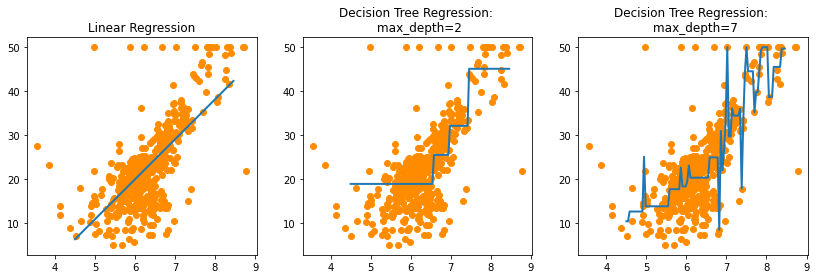

In [22]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

# X축값을 4.5 ~ 8.5로 변환하며 입력했을 때, 선형 회귀와 결정 트리 회귀 예측 선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선 
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr,label="linear", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth:3", linewidth=2 )

# DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선 
ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(bostonDF_sample.RM, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth:7", linewidth=2)
